<a href="https://colab.research.google.com/github/engphb/Development-in-Python-of-a-Neural-Network-capable-of-identifying-nuclear-accidents/blob/main/Redes_Neurais_Identifica%C3%A7%C3%A3o_de_Acidentes_Angra_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as Bibliotecas

1.   numpy
2.   pandas
3.   keras
4.   sklearn
5.   matplotlib
6.   tensorflow





In [ ]:
import numpy as np
from numpy.random import seed 
import pandas as pd 
import matplotlib.pyplot as plt
import keras
from tensorflow import random
from keras.models import Sequential
from tensorflow.keras import layers, models, optimizers
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

# Leitura de Dados

In [ ]:
df = pd.read_excel('/content/Dados_Acidentes.xlsx')
df.head()

,Tempo (s),Vazao no nucleo (%),Temperatura na perna quente (C),Temperatura na perna fria (C),Vazao no nucleo (kg/s),Nivel no gerador de vapor - Faixa larga (%),Nivel no gerador de vapor - Faixa estreita (%),Pressao no gerador de vapor (Mpa),Vazao de agua de alimentacao (kg/s),Vazao de vapor (kg/s),Vazao no circuito primario (kg/s),Pressao no sistema primario (Mpa),Potencia Termica (%),Potencia Nuclear (%),Margem de sub-resfriamento (C),Nivel do pressurizador (%),Temperatura media no primario (C),acidente
0,0,105.2230,324.465,291.456,50418.4,50.0000,62.5153,6.89480,527.7670,527.767,105.2230,15.8000,100.00000,100.00000,21.8620,59.1491,307.959,blackout
1,1,105.3900,324.463,291.457,50418.3,50.0078,62.5169,6.89413,527.8900,528.396,105.3900,15.7999,100.00500,100.00500,21.8967,59.1357,307.942,blackout
2,2,99.4508,325.009,291.500,50044.8,49.0423,62.2777,6.94732,34.5845,354.461,99.4663,15.4866,11.97310,11.97570,30.3013,54.6116,303.144,blackout
3,3,92.9815,324.302,291.910,49535.0,45.4870,61.7591,7.18567,34.0993,152.994,93.0863,15.1530,10.22470,10.22570,38.5294,49.9259,298.083,blackout
4,4,87.1439,320.759,292.337,49044.1,39.7598,61.2484,7.41172,33.5098,210.368,87.3292,14.9126,9.05521,9.05586,41.9348,46.6158,295.654,blackout


In [ ]:
#Randomiza as linhas
df = df.sample(frac=1, replace=False, random_state=1)
print(df)

     Tempo (s)  ...  acidente
404         38  ...  mfwbrsem
646         36  ...  mfwbrsem
159         37  ...  mfwbrsem
449         22  ...  mstmisem
699         28  ...  mstmisem
..         ...  ...       ...
645         35  ...  mfwbrsem
715         44  ...  mstmisem
72          11  ...  mefwisem
235         52  ...  mstmisem
37          37  ...  blackout

[732 rows x 18 columns]


# Separando o Conjunto de Dados em Treinamento, Validação e Teste

In [ ]:
x_train = df.iloc[:532, 1:17].astype(float)
y_train = df.iloc[:532, 17].astype('category')
x_valid = df.iloc[532:632, 1:17].astype(float)
y_valid = df.iloc[532:632, 17].astype('category')
x_test = df.iloc[632:732, 1:17].astype(float)
y_test = df.iloc[632:732, 17].astype('category')
parametro = y_test
#print(x_train)
#print(y_train)

In [ ]:
list_r= []
for i in parametro.items():
  list_r.append(i[1])

# Normalizando as Entradas

In [ ]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

Normalizer=(MinMaxScaler(feature_range = (0,1)))

x_train=Normalizer.fit_transform(x_train)
x_valid=Normalizer.transform(x_valid)
x_test=Normalizer.transform(x_test)

In [ ]:
x_train

array([[0.93740119, 0.8035646 , 0.6093786 , ..., 0.1740651 , 0.63420186,
        0.68480836],
       [0.93329678, 0.75485732, 0.60042276, ..., 0.21136537, 0.61520976,
        0.68864073],
       [0.939272  , 0.79512025, 0.58627825, ..., 0.17555943, 0.61807486,
        0.67203273],
       ...,
       [0.94982786, 0.75196843, 0.47761094, ..., 0.26981076, 0.54801113,
        0.6184942 ],
       [0.95844815, 0.84574986, 0.54315273, ..., 0.1578377 , 0.64388161,
        0.72766279],
       [0.02381064, 0.07482994, 0.19849314, ..., 0.91738464, 0.05733775,
        0.16590685]])

# Codificando as Saídas

In [ ]:
#Converte labels para vetores
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_valid = lb.transform(y_valid)
y_test = lb.transform(y_test)

In [ ]:
y_train

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0]])

# Modelando a Rede Neural

In [ ]:
model = models.Sequential()
model.add(layers.Dense(100,activation='relu',input_dim=(x_train.shape[1])))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(4,activation='softmax')) #Softmax de cada vetor x é calculado como exp (x) / tf.reduce_sum (exp (x)).
#Resumo do Modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               1700      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 132       
Total params: 10,376
Trainable params: 10,376
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Treinamento da Rede Neural

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_valid, y_valid))

Epoch 1/100
17/17 [==============================] - 1s 16ms/step - loss: 1.1916 - accuracy: 0.3717 - val_loss: 0.9385 - val_accuracy: 0.5200
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.8213 - accuracy: 0.5944 - val_loss: 0.4827 - val_accuracy: 0.8200
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4935 - accuracy: 0.7981 - val_loss: 0.3044 - val_accuracy: 0.9300
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3124 - accuracy: 0.8985 - val_loss: 0.2257 - val_accuracy: 0.8800
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2882 - accuracy: 0.8914 - val_loss: 0.1453 - val_accuracy: 0.9600
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2373 - accuracy: 0.9201 - val_loss: 0.1161 - val_accuracy: 0.9500
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2042 - accuracy: 0.9423 - val_loss: 0.1063 - val_accuracy: 0.9700
Epoch 8/100


# Salvando a Rede Neural

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#serialize model to JSON
model_json = model.to_json()
with open("/content/drive/My Drive/cenario2-ANGRA-model.json", "w") as json_file:
    json_file.write(model_json)
    
#serialize weights to HDF5
model.save_weights("/content/drive/My Drive/cenario2-ANGRA-model.h5")
print("Saved model to disk")

Saved model to disk


# Resultado Real x Esperado

In [ ]:
y_pred = model.predict(x_test)
print(y_pred, y_test, end='')

[[1.62461049e-07 3.57255180e-06 4.96111263e-10 9.99996305e-01]
 [1.88837575e-07 9.99899268e-01 1.00466597e-04 3.05561763e-08]
 [1.69800035e-06 9.89683390e-01 1.03147393e-02 2.91695386e-07]
 [1.28081638e-06 9.92925286e-01 7.07314815e-03 2.10395697e-07]
 [1.00000000e+00 1.18037621e-10 8.88187737e-16 6.71302749e-13]
 [9.75301772e-15 3.55481825e-06 9.99996424e-01 1.21984365e-16]
 [1.58886024e-07 3.48230333e-06 4.62364813e-10 9.99996305e-01]
 [1.00000000e+00 2.82632528e-10 1.18924315e-15 5.76784193e-12]
 [7.72875046e-06 1.09732886e-04 2.53888039e-08 9.99882460e-01]
 [5.58749491e-07 1.06598336e-05 7.39669159e-10 9.99988794e-01]
 [2.86125965e-06 9.80199397e-01 1.97973140e-02 5.07598600e-07]
 [7.60029835e-08 1.03080970e-06 4.72199710e-11 9.99998927e-01]
 [1.00000000e+00 1.01154196e-09 2.38981740e-13 1.23847905e-12]
 [4.76510758e-13 1.09071094e-04 9.99890924e-01 1.03229676e-14]
 [1.28081638e-06 9.92925286e-01 7.07314815e-03 2.10395697e-07]
 [3.65481376e-15 2.09491100e-06 9.99997854e-01 4.016841

In [ ]:
new = []
for i in range(0,len(y_pred)): 
    lista = [y_pred[i][0], y_pred[i][1],y_pred[i][2],y_pred[i][3]]
    p = lista.index(max(lista))
    lista = []
    if p == 0:
      new.append(1)#('blackout - 1')
    if p == 1:
      new.append(4)#('mefwisem - 4')
    if p == 2:
      new.append(7)#('mfwbrsem - 7')
    if p== 3:
      new.append(10)#('mstmisem - 10')
c = ['Retorno da Rede']
df = pd.DataFrame(data=new, columns=c)
df['Cenários Originais'] = list_r
df[df['Cenários Originais'] != df['Retorno da Rede']]


,Retorno da Rede,Cenários Originais
0,10,mstmisem
1,4,mefwisem
2,4,mefwisem
3,4,mefwisem
4,1,blackout
...,...,...
95,7,mfwbrsem
96,10,mstmisem
97,4,mefwisem
98,10,mstmisem


# Avaliando Performance da Rede Neural

In [ ]:
model.evaluate(x_train, y_train)

17/17 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 0.9680


[0.06487105041742325, 0.9680451154708862]

In [ ]:
model.evaluate(x_valid, y_valid)

4/4 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9700


[0.056642040610313416, 0.9700000286102295]

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 0.9900


[0.018748566508293152, 0.9900000095367432]

In [ ]:
print('MAE:', mean_absolute_error(y_test, y_pred))  
print('MSE:', mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2_Score:', r2_score(y_test, y_pred))

MAE: 0.005277268066085891
MSE: 0.0022107603483911696
RMSE: 0.04701872338112945
R2_Score: 0.988503026294814


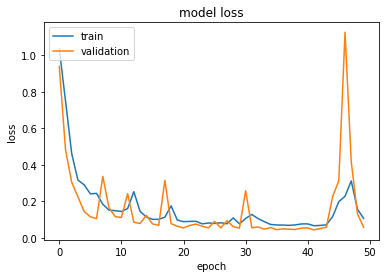

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'][0:50])
plt.plot(history.history['val_loss'][0:50])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.close()

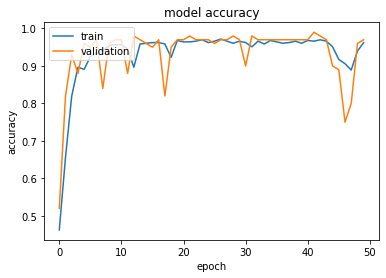

In [ ]:
plt.plot(history.history['accuracy'][0:50])
plt.plot(history.history['val_accuracy'][0:50])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

coefficient of determination: 1.0
intercept: 0.0
slope: [1.]


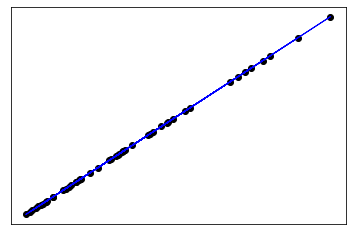

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = y_test.reshape(-1, 1)
y = y_train

model = LinearRegression()

model.fit(x, y)

model = LinearRegression().fit(x, y)

r_sq = r2_score(y_test, y_pred)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

# Plot outputs
plt.scatter(y_test, y_test,  color='black')
plt.plot(y_test, y_pred, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()
